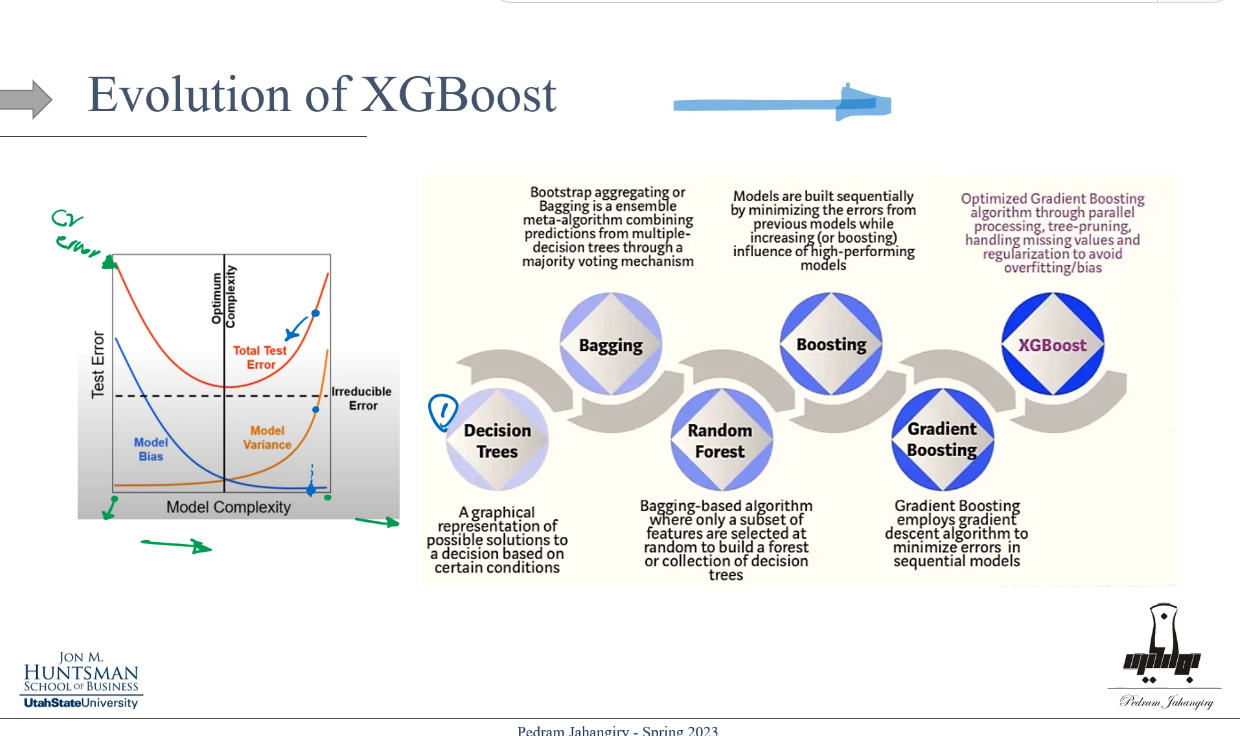

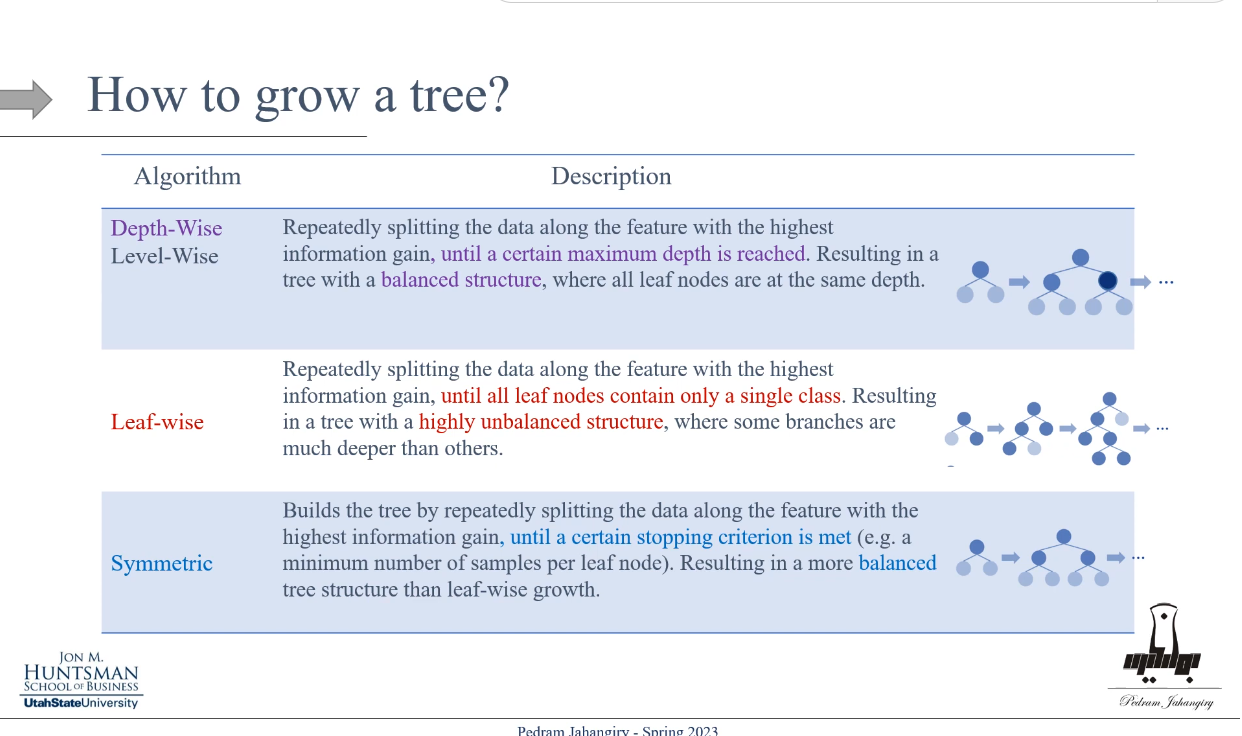

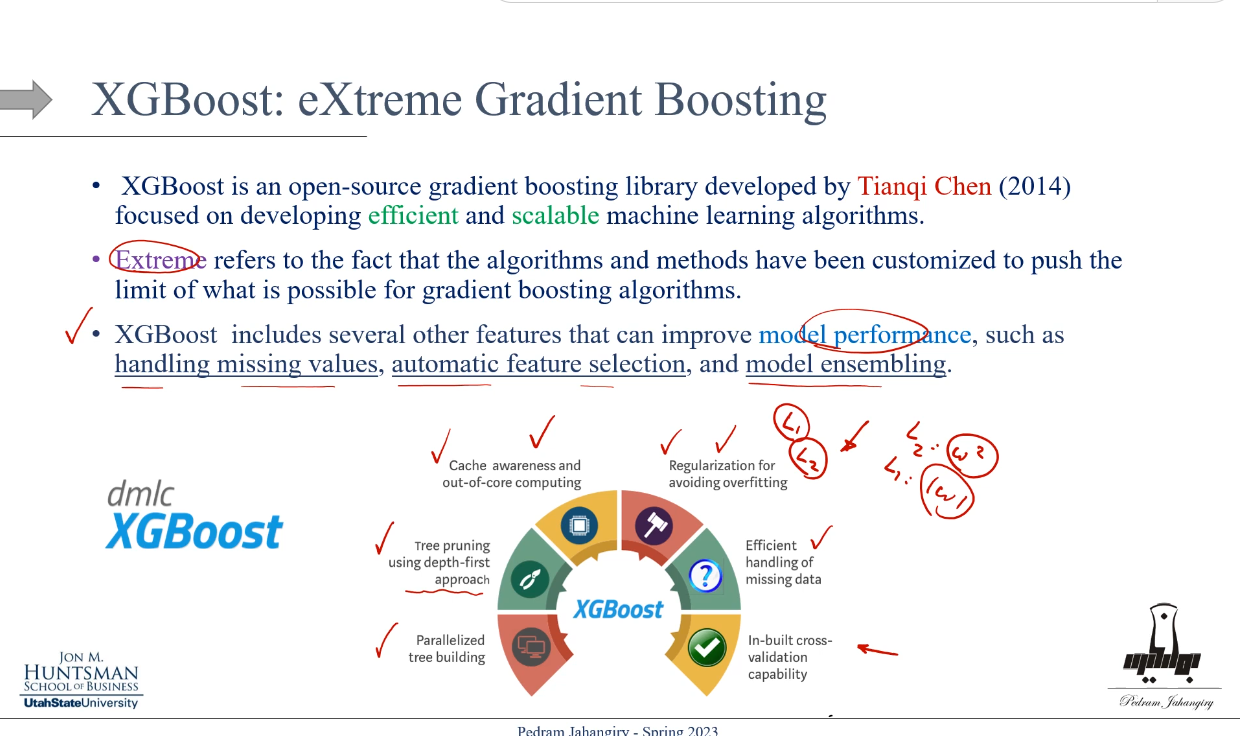

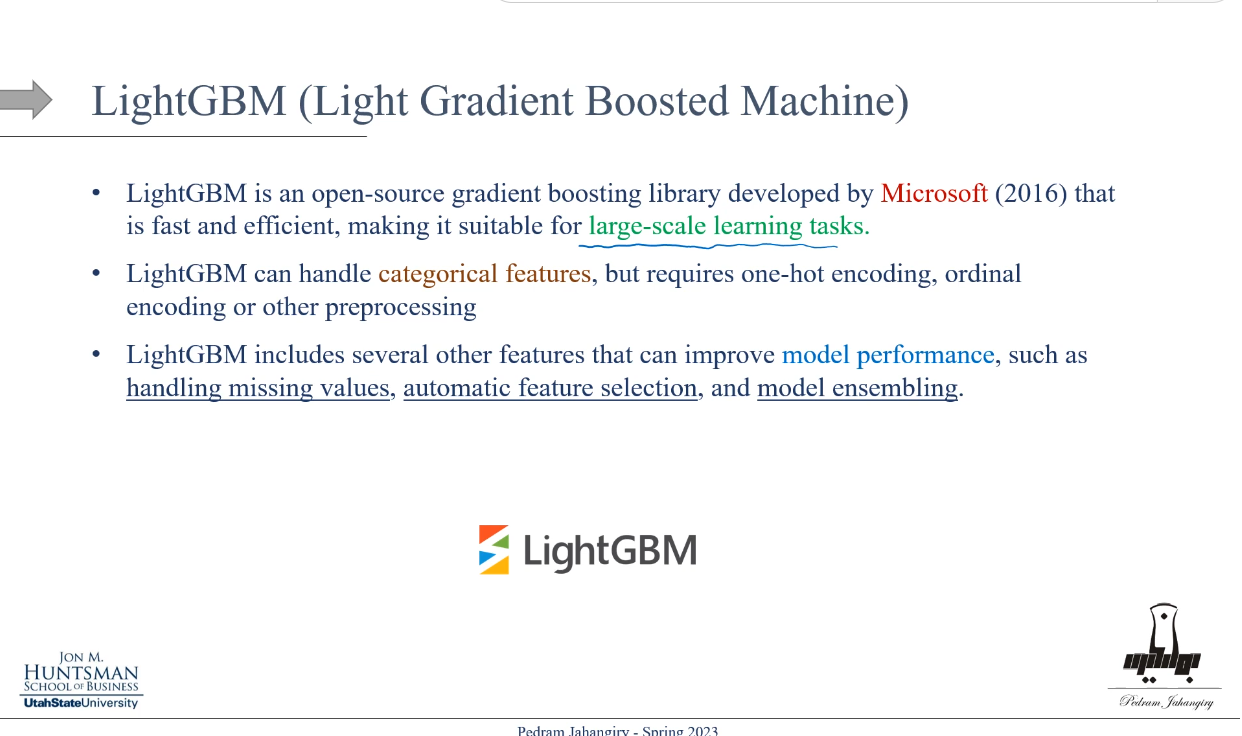

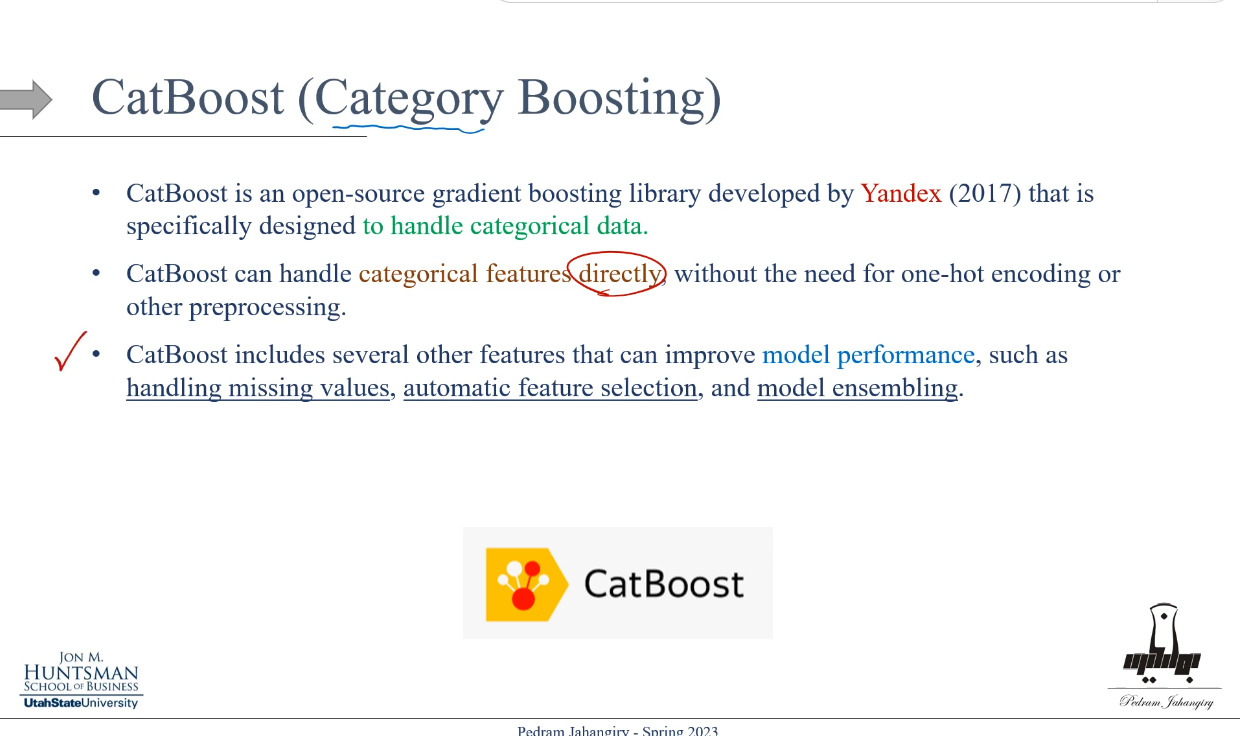

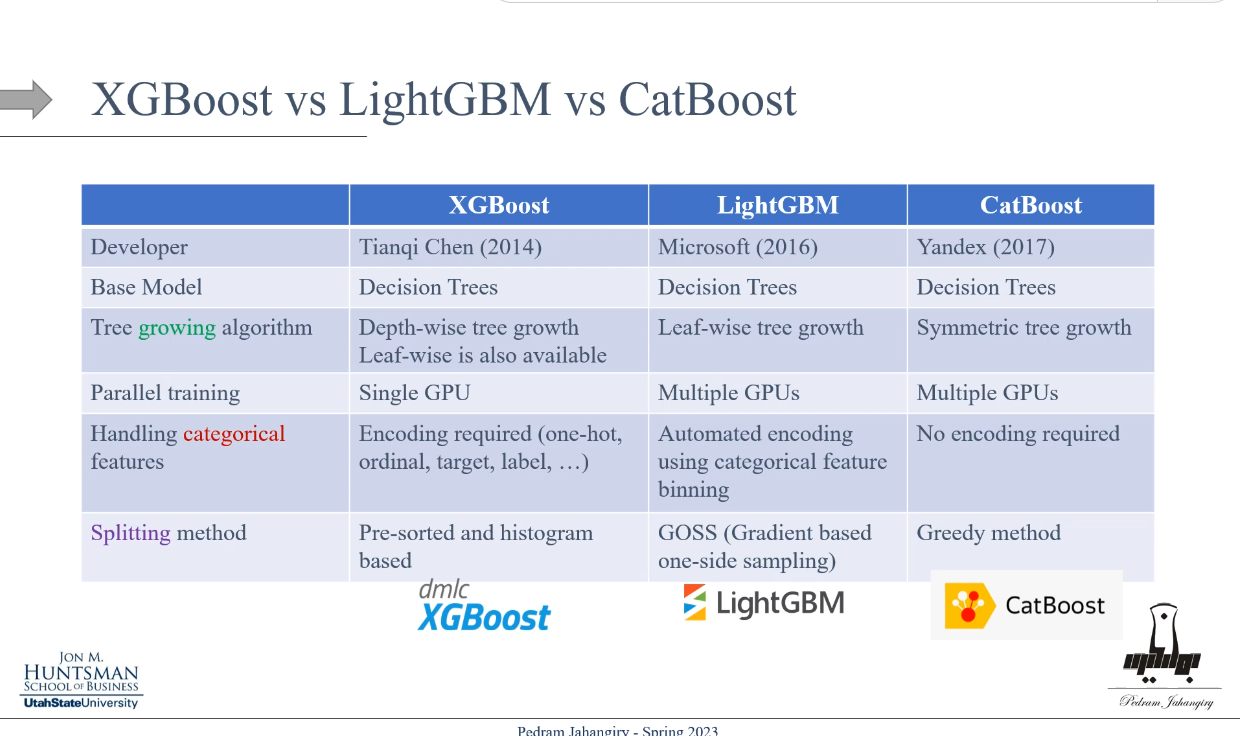

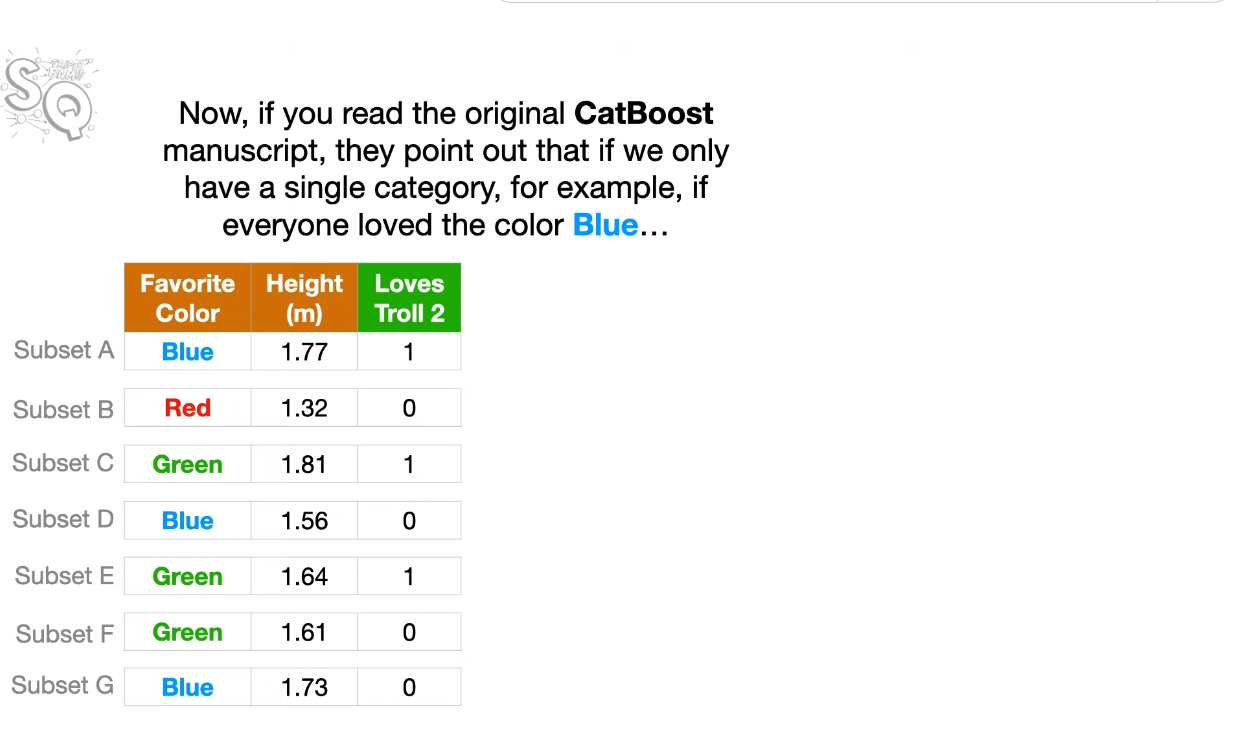

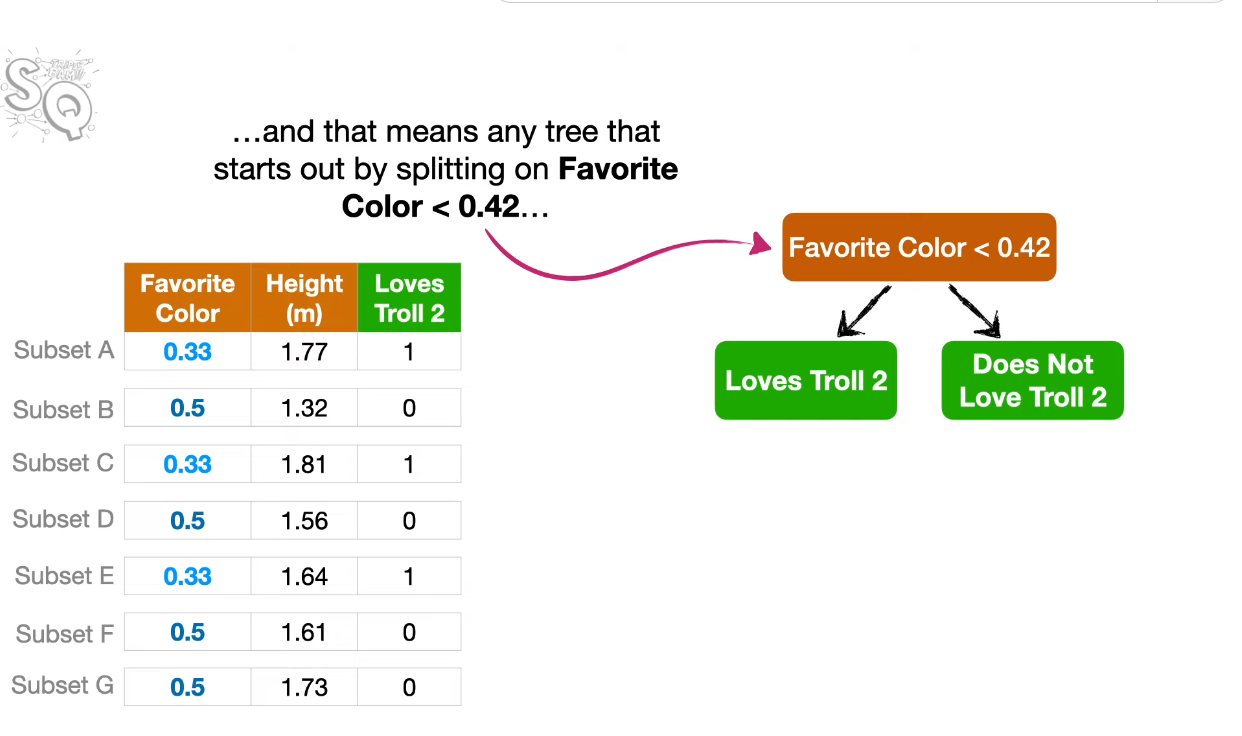

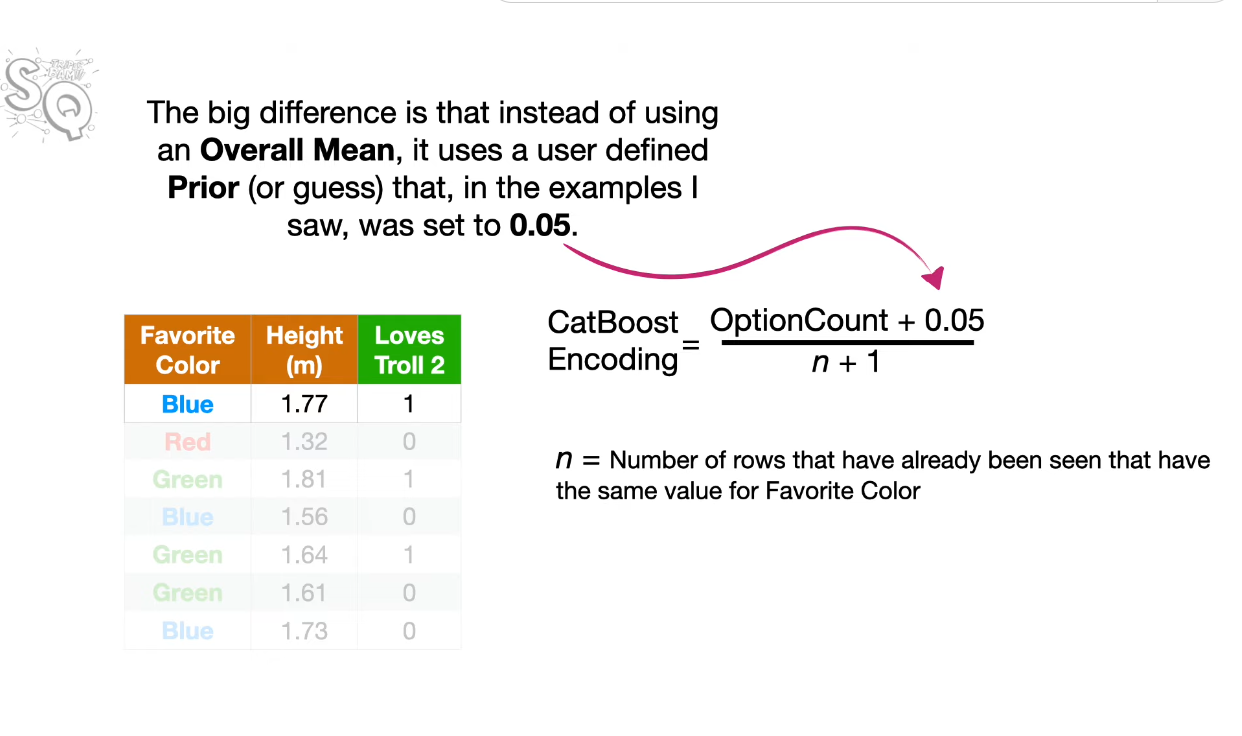

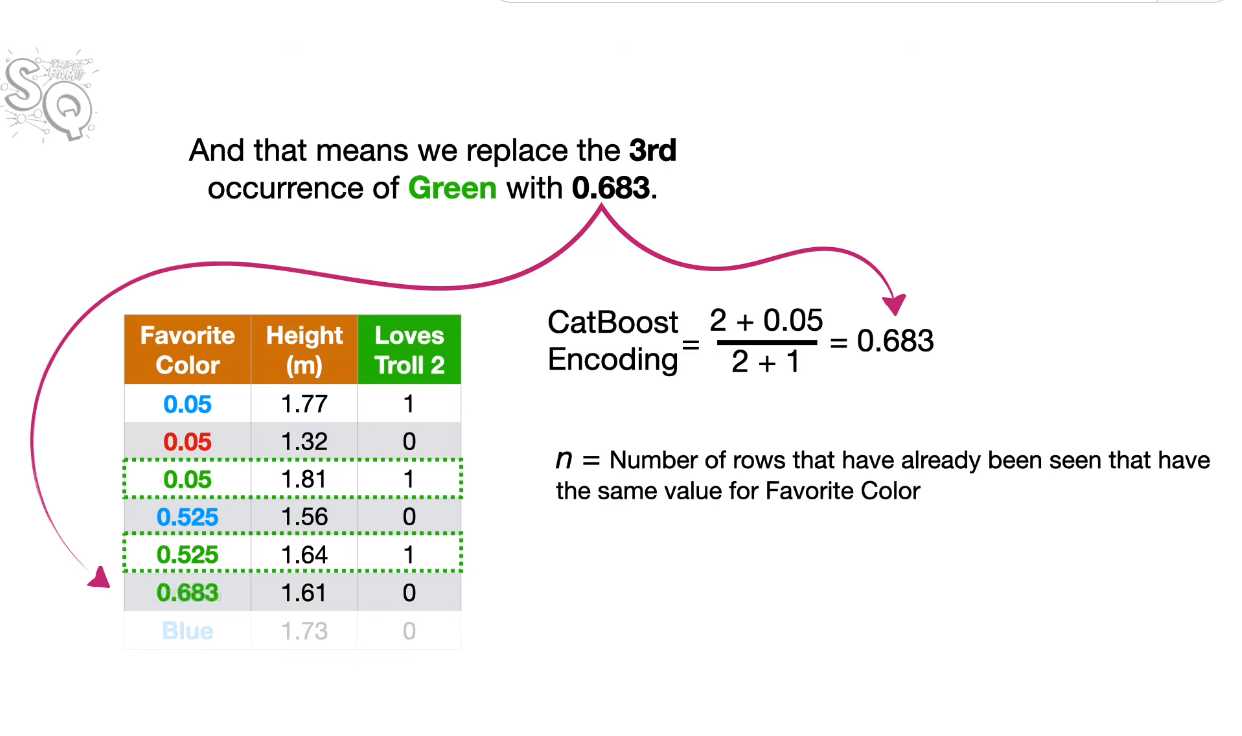

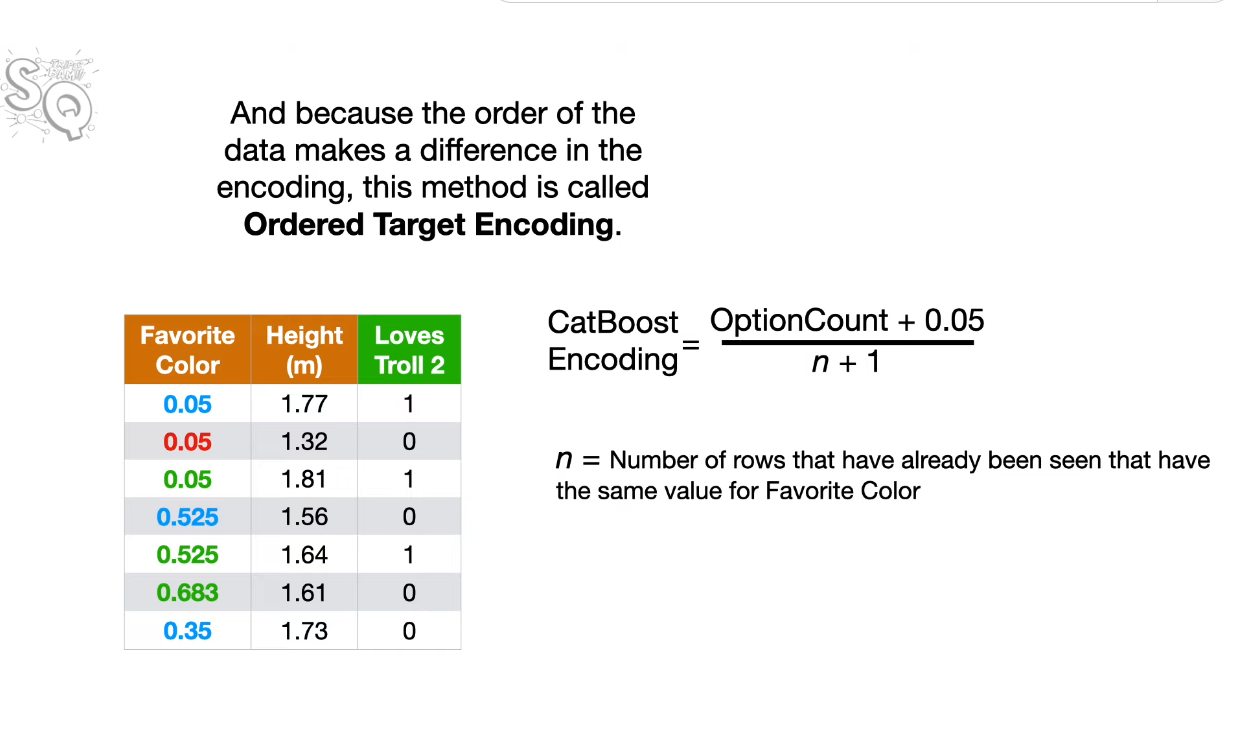

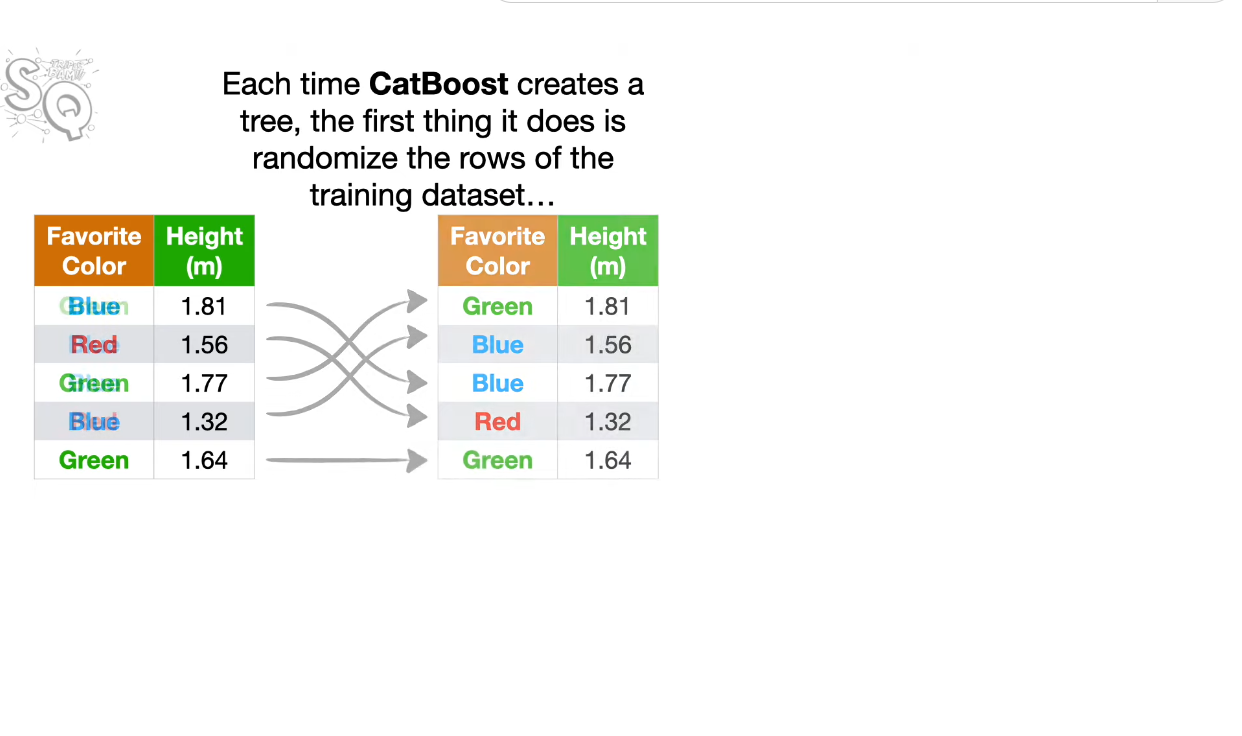

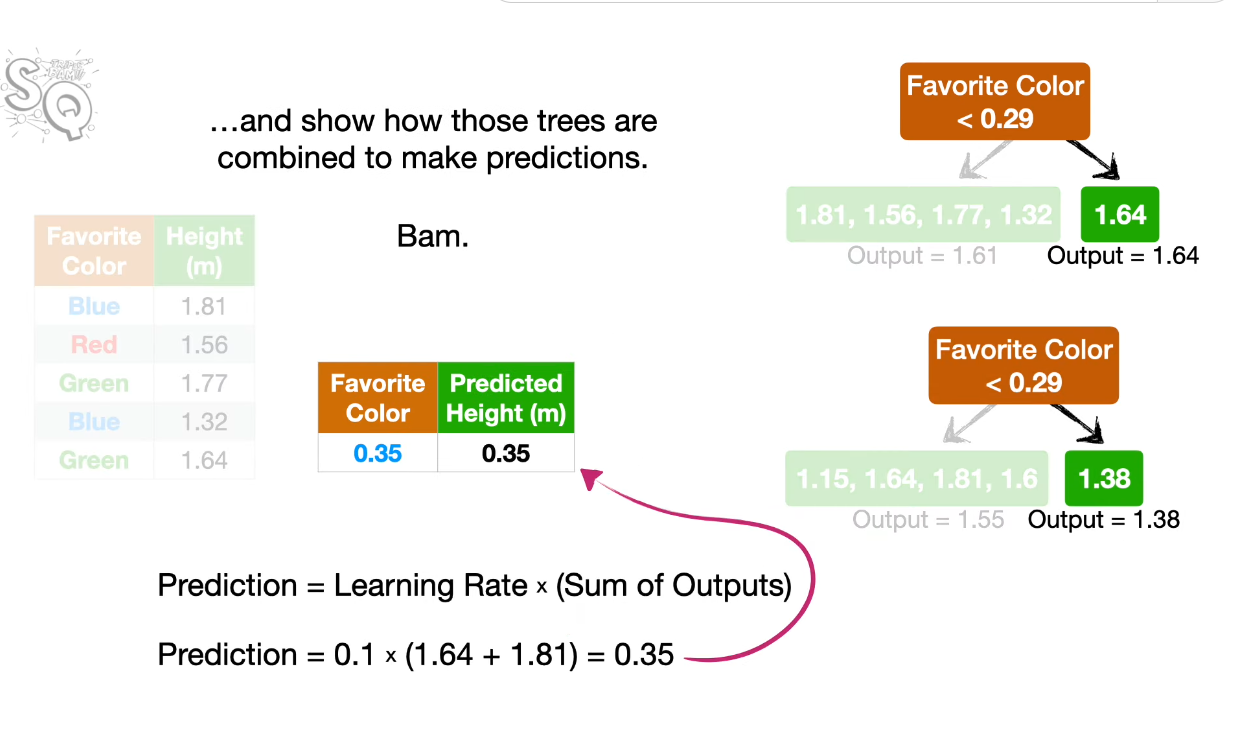

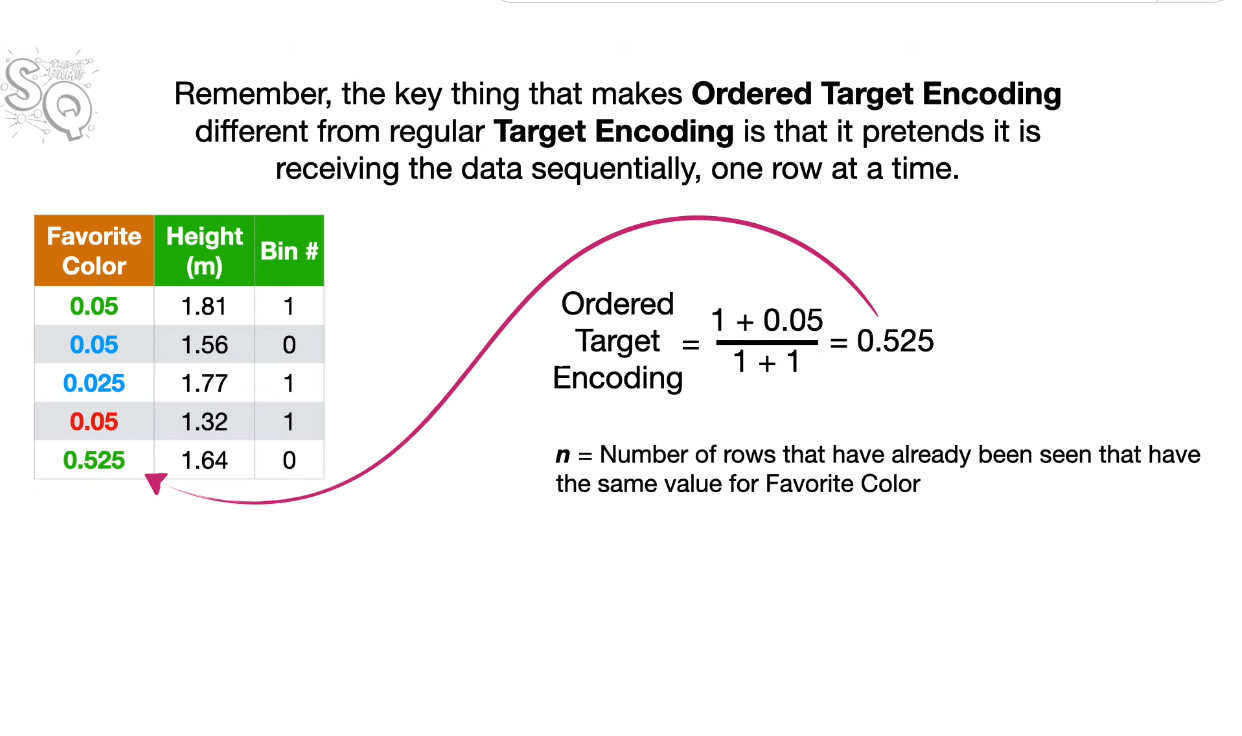

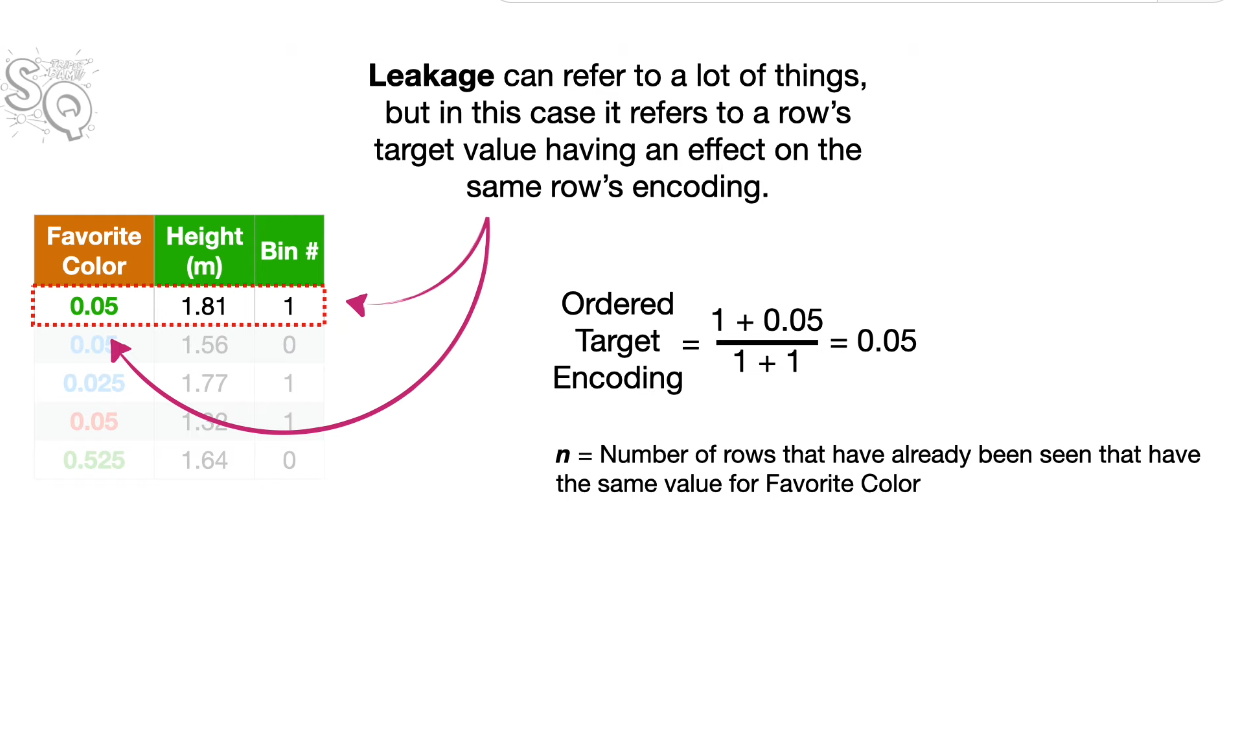

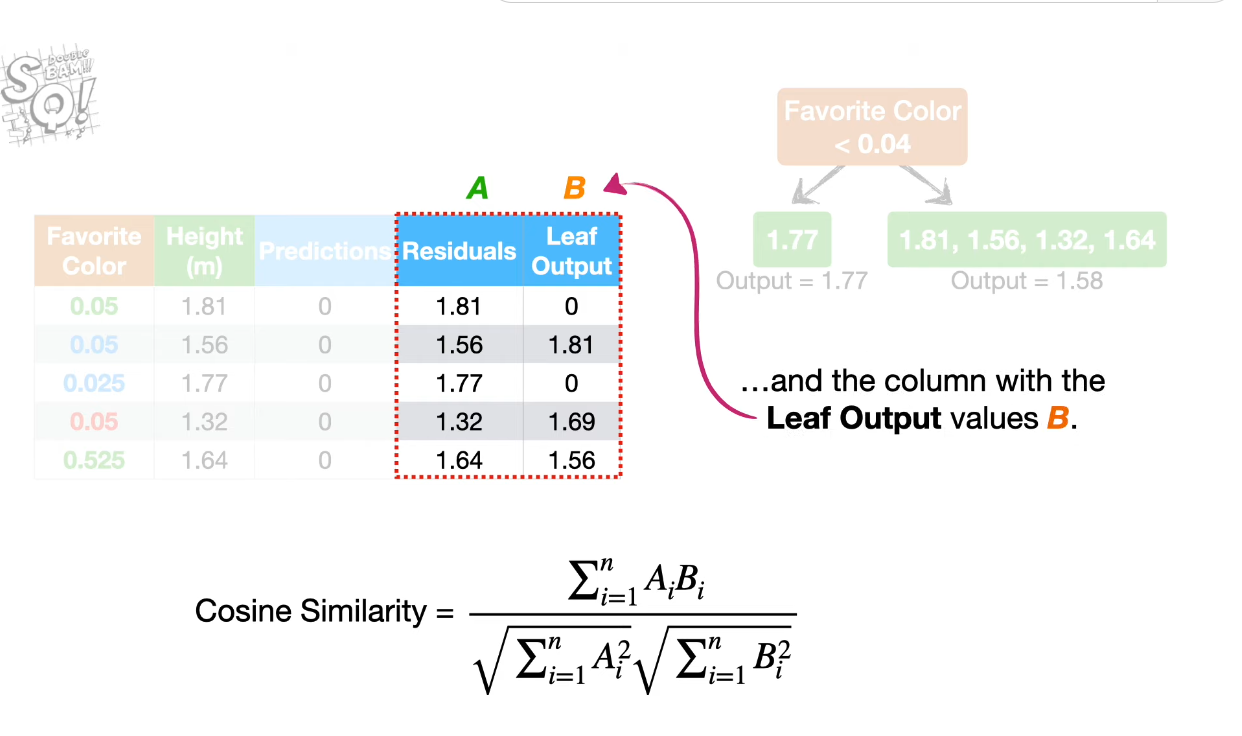

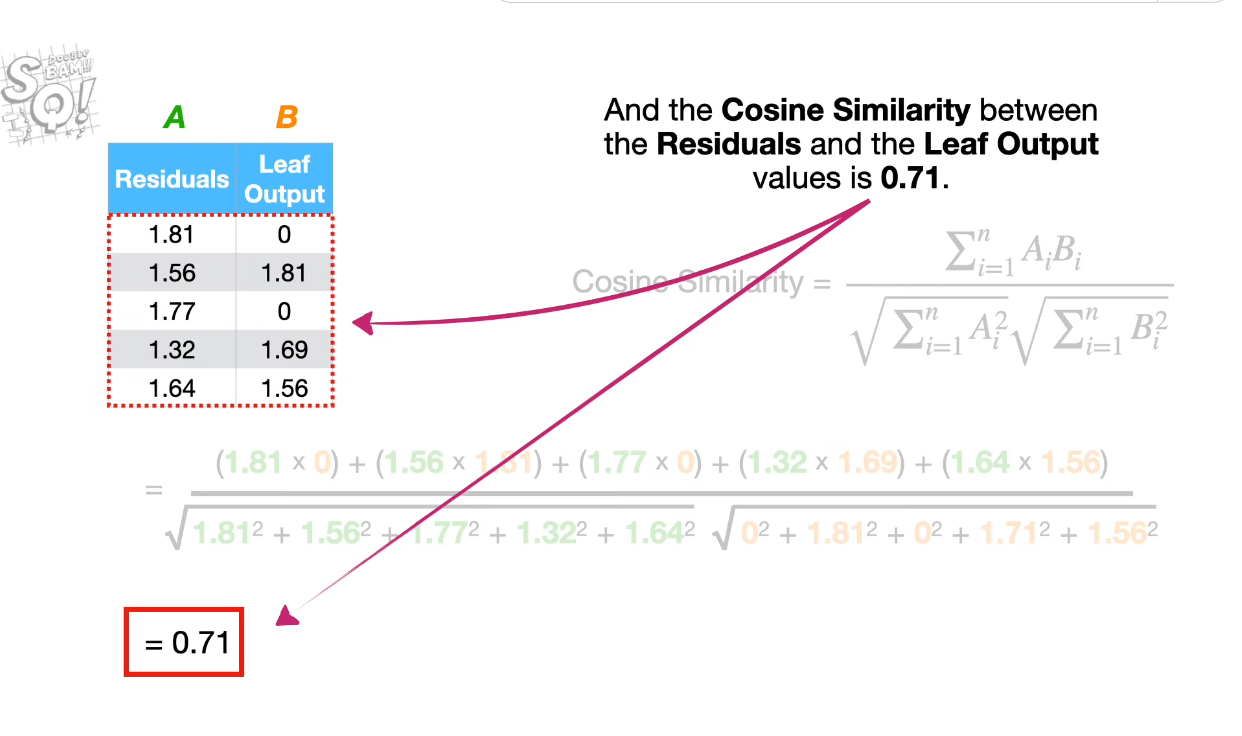

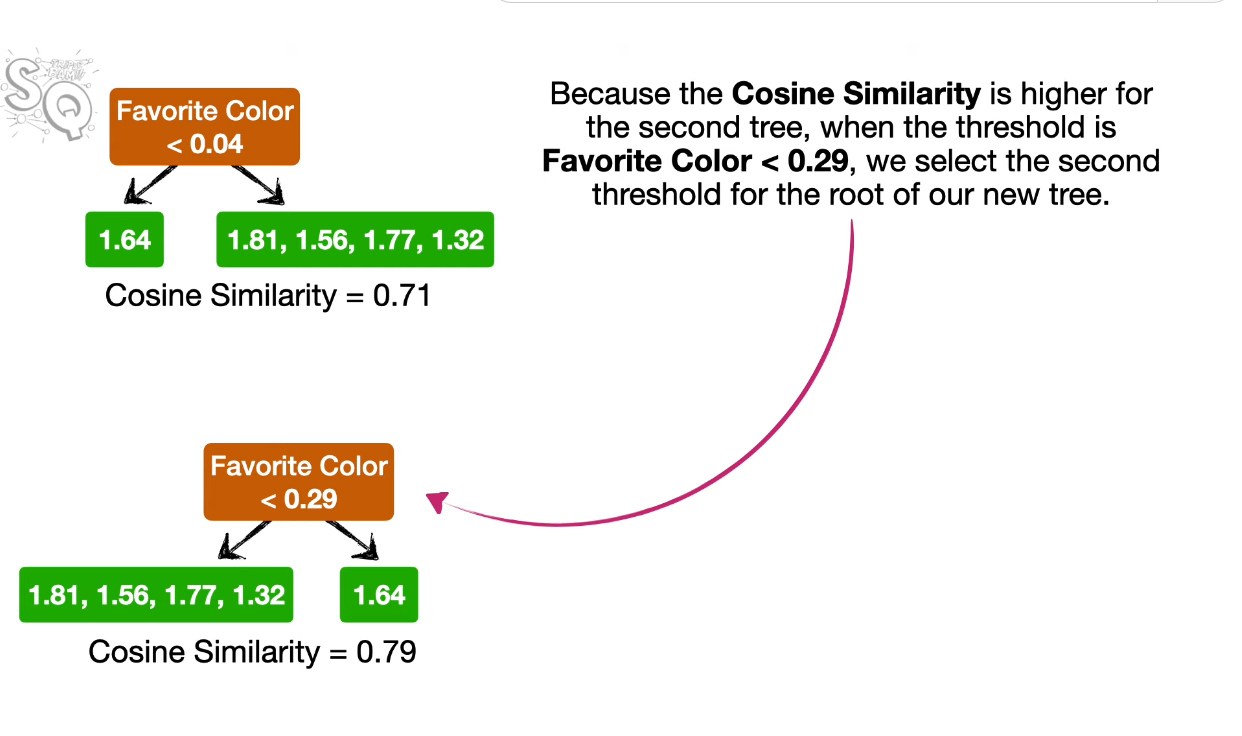

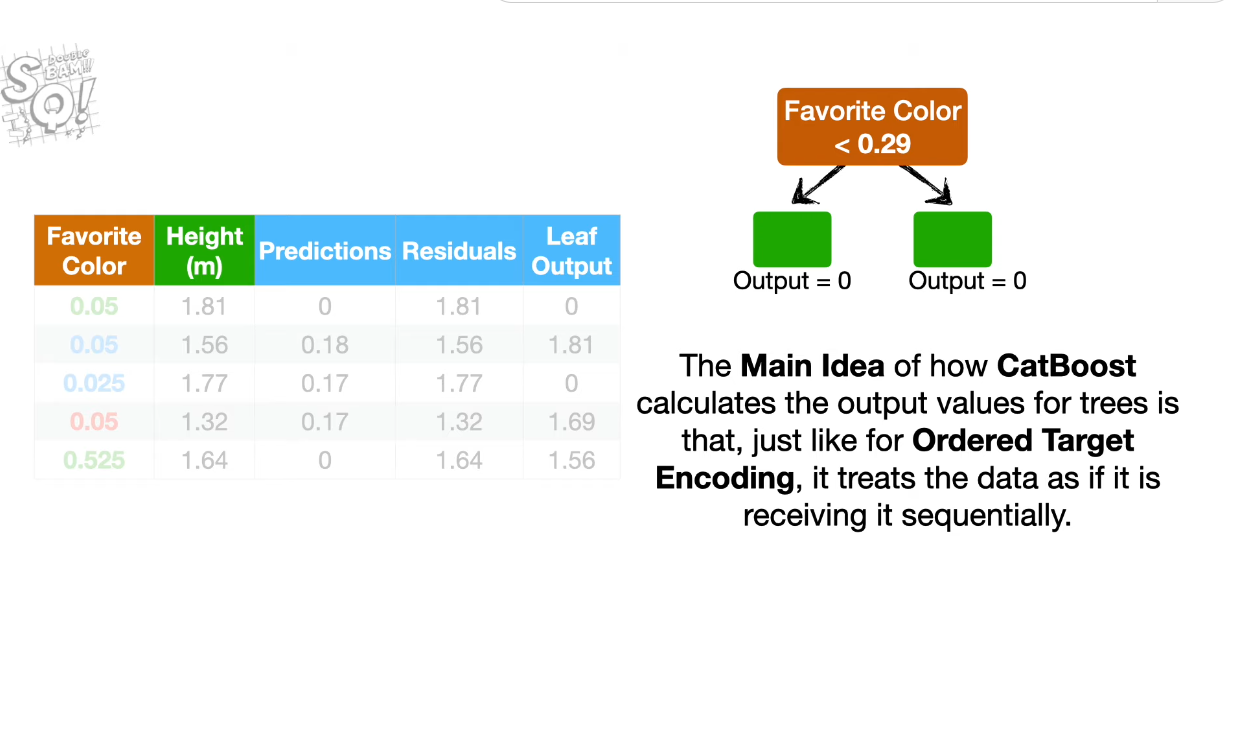

In [ ]:
!pip install "u8darts[all]"

In [ ]:
from darts.datasets import WeatherDataset

from darts.models import CatBoostModel

series = WeatherDataset().load()

In [ ]:
from darts import TimeSeries

# Assuming 'series' is your TimeSeries object
# Convert TimeSeries to pandas DataFrame
df = series.pd_dataframe()

# Save the DataFrame to a CSV file
df.to_csv('Weather_Dataset.csv', index=False)


In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
csv_file_path = 'Weather_Dataset.csv'  # Change to the path where your CSV file is located
df = pd.read_csv(csv_file_path)

# Print basic information about the DataFrame
print(df.info())

# Display the first few rows of the DataFrame
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52704 entries, 0 to 52703
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   p (mbar)              52695 non-null  float64
 1   T (degC)              52695 non-null  float64
 2   Tpot (K)              52695 non-null  float64
 3   Tdew (degC)           52695 non-null  float64
 4   rh (%)                52695 non-null  float64
 5   VPmax (mbar)          52695 non-null  float64
 6   VPact (mbar)          52695 non-null  float64
 7   VPdef (mbar)          52695 non-null  float64
 8   sh (g/kg)             52695 non-null  float64
 9   H2OC (mmol/mol)       52695 non-null  float64
 10  rho (g/m**3)          52695 non-null  float64
 11  wv (m/s)              52695 non-null  float64
 12  max. wv (m/s)         52695 non-null  float64
 13  wd (deg)              52695 non-null  float64
 14  rain (mm)             52695 non-null  float64
 15  raining (s)        

In [ ]:
from darts.datasets import WeatherDataset

from darts.models import CatBoostModel

series = WeatherDataset().load()

# predicting atmospheric pressure

target = series['p (mbar)'][:100]

# optionally, use past observed rainfall (pretending to be unknown beyond index 100)

past_cov = series['rain (mm)'][:100]

# optionally, use future temperatures (pretending this component is a forecast)

future_cov = series['T (degC)'][:106]

# predict 6 pressure values using the 12 past values of pressure and rainfall, as well as the 6 temperature

# values corresponding to the forecasted period

model = CatBoostModel(

    lags=12,

    lags_past_covariates=12,

    lags_future_covariates=[0,1,2,3,4,5],

    output_chunk_length=6

)

model.fit(target, past_covariates=past_cov, future_covariates=future_cov)

pred = model.predict(6)

pred.values()

array([[1006.4153701 ],
       [1006.41907237],
       [1006.30872957],
       [1006.28614154],
       [1006.22355514],
       [1006.21607546]])